# 下载数据

#### 读取CIFAR-10数据
> y代表label,x代表image

In [2]:
from keras.datasets import cifar10
import numpy as np
(x_train,y_train),\
(x_test,y_test)=cifar10.load_data()

C:\Users\admin\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


170500096/170498071 [==============================] - 384s 2us/step


# 查看训练数据
> 不同的label对应着不同的图像，0:airplane,1:automobile,2:bird,3:cat,4:deer,5:dog,6:frog,7:horse,8:ship,9:truck

#### shape一下，看看数据的组成结构 

In [3]:
x_train.shape#image的结构

(50000, 32, 32, 3)

In [4]:
y_train.shape#label的结构

(50000, 1)

#### 查看第一张image的内容

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

# 可视化image
#### 建立label与image一一对应的关系字典

In [6]:
dict={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [62]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        
        ax.imshow(images[idx],cmap='binary')           
        title= str(i)+'.'+dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+dict[prediction[i]] 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()#使用的还是MNIST数据集的可视化函数，只是改变了title的定义，使其看得更明了

#### 查看前面十个图片

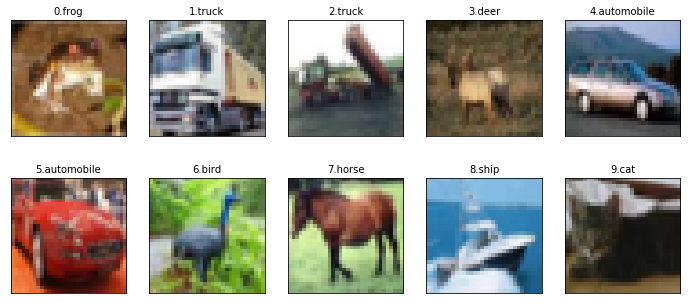

In [10]:
plot_images_labels_prediction(x_train,y_train,prediction=[],idx=0)

# 将images进行预处理
> 对数据进行标准化，和处理MINIST数据集的思想是一样的

In [16]:
x_train_normalize=x_train/255.0
x_test_normalize=x_test/255.0

#### 查看标准化后的结果

In [17]:
x_train_normalize

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

# 对label数据进行预处理
> 进行一位有效编码和MNIST数据集的处理是一样的

In [18]:
from keras.utils import np_utils
y_train_onehot=np_utils.to_categorical(y_train)
y_test_onehot=np_utils.to_categorical(y_test)

#### 查看转化后的label标签字段

In [20]:
y_train_onehot.shape
y_train_onehot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# 建立卷积神经网络模型

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D

##### 建立线性堆叠模型

In [22]:
model=Sequential()

##### 建立卷积层1

In [30]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
         input_shape=(32,32,3),activation='relu',
         padding='same'))

In [32]:
model.add(Dropout(rate=0.25))#设置dropout为25%

##### 建立池化层1

In [33]:
model.add(MaxPooling2D(pool_size=(2,2)))
#将32*32的图像变为16*16，图像的个数仍然为32个

##### 建立卷积层2

In [36]:
model.add(Conv2D(filters=64,kernel_size=(3,3),
                activation='relu',padding='same'))
#将图像个数变为64，图像的大小仍然为16*16

In [37]:
model.add(Dropout(rate=0.25))#避免过拟合

##### 建立池化层2

In [38]:
model.add(MaxPooling2D(pool_size=(2,2)))

##### 建立平坦层

In [39]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

##### 建立隐藏层

In [41]:
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))#避免过拟合

##### 建立输出层

In [42]:
model.add(Dense(10,activation='softmax'))

##### 查看模型摘要

In [44]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 进行训练

##### 定义训练方式

In [45]:
model.compile(loss='categorical_crossentropy',#设置损失函数
             optimizer='adam',metrics=['accuracy'])#设置优化器和定义评估模型方式

In [46]:
train_history=model.fit(x_train_normalize,y_train_onehot,
                       validation_split=0.2,
                       epochs=10,batch_size=128,verbose=2)#训练周期为10，每次训练128项数据

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 310s - loss: 1.5489 - acc: 0.4436 - val_loss: 1.3615 - val_acc: 0.5575
Epoch 2/10
 - 294s - loss: 1.1747 - acc: 0.5818 - val_loss: 1.1727 - val_acc: 0.6203
Epoch 3/10
 - 277s - loss: 1.0407 - acc: 0.6336 - val_loss: 1.0580 - val_acc: 0.6687
Epoch 4/10
 - 257s - loss: 0.9329 - acc: 0.6701 - val_loss: 0.9902 - val_acc: 0.6756
Epoch 5/10
 - 257s - loss: 0.8434 - acc: 0.7012 - val_loss: 0.9386 - val_acc: 0.6915
Epoch 6/10
 - 3895s - loss: 0.7594 - acc: 0.7327 - val_loss: 0.8906 - val_acc: 0.7139
Epoch 7/10
 - 338s - loss: 0.6715 - acc: 0.7650 - val_loss: 0.8480 - val_acc: 0.7154
Epoch 8/10
 - 335s - loss: 0.6106 - acc: 0.7878 - val_loss: 0.8086 - val_acc: 0.7290
Epoch 9/10
 - 361s - loss: 0.5374 - acc: 0.8103 - val_loss: 0.7926 - val_acc: 0.7290
Epoch 10/10
 - 394s - loss: 0.4856 - acc: 0.8293 - val_loss: 0.7823 - val_acc: 0.7344


##### 可视化准确率和误差

In [48]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):#输入参数分别为，train_history,
                                                        #训练数据的执行结果，验证数据的执行结果
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

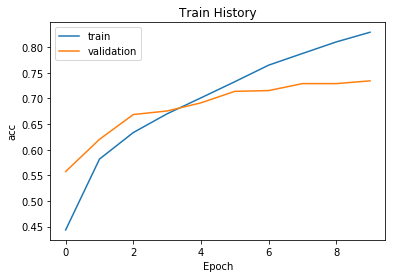

{'acc': [0.443575,
  0.581775,
  0.63355,
  0.670125,
  0.7012,
  0.732675,
  0.764975,
  0.787775,
  0.810325,
  0.82925],
 'loss': [1.5489341194152833,
  1.1746543694496154,
  1.0407079723358155,
  0.9328960960388184,
  0.8434274671554566,
  0.7594253509521485,
  0.671516370010376,
  0.6106255568504334,
  0.5374301322937012,
  0.48556572380065915],
 'val_acc': [0.5575,
  0.6203,
  0.6687,
  0.6756,
  0.6915,
  0.7139,
  0.7154,
  0.729,
  0.729,
  0.7344],
 'val_loss': [1.3614615459442139,
  1.1727069728851318,
  1.0579507133483887,
  0.9902402221679687,
  0.9386354804992676,
  0.8906289207458497,
  0.8480340557098389,
  0.8086261804580689,
  0.7925947729110718,
  0.7822921306610108]}

In [56]:
show_train_history(train_history,'acc','val_acc')
train_history.history

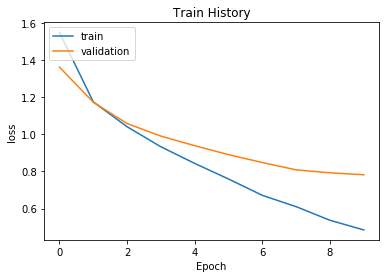

In [57]:
show_train_history(train_history,'loss','val_loss')

# 评估模型准确率

In [49]:
score=model.evaluate(x_test_normalize,y_test_onehot)
score[1]

10000/10000 [==============================] - 31s 3ms/step


0.7284

##### 进行预测

In [50]:
prediction=model.predict_classes(x_test_normalize)

##### 查看预测结果

In [61]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 2, 3, 1], dtype=int64)

##### 查看前十项预测结果

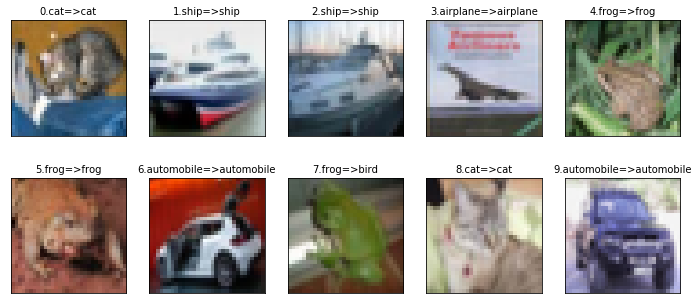

In [63]:
plot_images_labels_prediction(x_test,y_test,prediction,0,10)

##### 查看预测概率

In [64]:
probability=model.predict(x_test_normalize)

In [67]:
probability.shape

(10000, 10)

In [93]:
def show_probability(y,prediction,x,#y为真实值，prediction为预测结果，x为预测的图像
                     probability,i):#probability为预测概率，i表示开始显示数据的index
    print('label:',dict[y[i][0]],
         'prediction:',dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_test[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(dict[j]+'\t\tprobability:%f'%(probability[i][j]))
    

label: cat prediction: cat


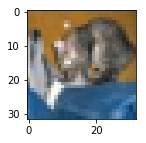

airplane		probability:0.000951
automobile		probability:0.001414
bird		probability:0.015849
cat		probability:0.662395
deer		probability:0.006565
dog		probability:0.283635
frog		probability:0.017295
horse		probability:0.003373
ship		probability:0.006642
truck		probability:0.001881


In [94]:
show_probability(y_test,prediction,x_test,probability,0)#第0项数据的预测结果

label: airplane prediction: airplane


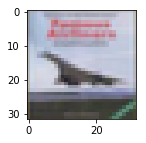

airplane		probability:0.780524
automobile		probability:0.010881
bird		probability:0.056743
cat		probability:0.000491
deer		probability:0.003982
dog		probability:0.000053
frog		probability:0.000369
horse		probability:0.000228
ship		probability:0.145283
truck		probability:0.001446


In [95]:
show_probability(y_test,prediction,x_test,probability,3)#查看第三项数据的预测概率

# 显示混淆矩阵

##### 建立混淆矩阵

In [96]:
prediction

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [97]:
prediction.shape

(10000,)

In [100]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

In [106]:
y_test.reshape(-1)#将y_test变为一维数组

array([3, 8, 8, ..., 5, 1, 7])

In [109]:
import pandas as pd
print(dict)
pd.crosstab(y_test.reshape(-1),prediction,
           rownames=['label'],colnames=['prediction'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,788,17,52,6,9,6,22,11,55,34
1,6,818,14,6,3,4,17,4,26,102
2,58,3,627,24,111,54,78,24,13,8
3,24,9,83,416,94,182,136,26,12,18
4,18,2,65,22,719,25,80,57,10,2
5,16,2,45,118,68,622,64,46,7,12
6,5,5,38,21,25,15,879,4,5,3
7,15,1,44,21,65,46,18,773,4,13
8,51,32,24,7,10,5,8,2,831,30


### 结论
- 蛙类最不容易混淆，猫类最容易混淆
- 狗很容易被认为是猫，应为真实值为5预测为3有118次
- 由上图同理可以看出猫也十分容易被预测成狗
- 2，3，4，5，6预测为1的数量都十分少

> 最后反思，本实验的准确率不高，因为模型比较简单，初衷是为了迅速看到实验的OUTPUT,加上我的处理器很垃圾，运行时间开销很大，条件允许的话，解决方法：可以增加卷积层，在Flatten层中建立多个隐藏层，并提高神经元的个数